Columnas: ['targetid', 'survey', 'program', 'desi_target', 'z', 'zwarn', 'spectype', 'desiname', 'specid', 'redshift']
Forma de X: (492, 7781)
Forma de y: (492,)
Entrenando modelo...
MSE: 0.576873
R2 Score: -0.4719


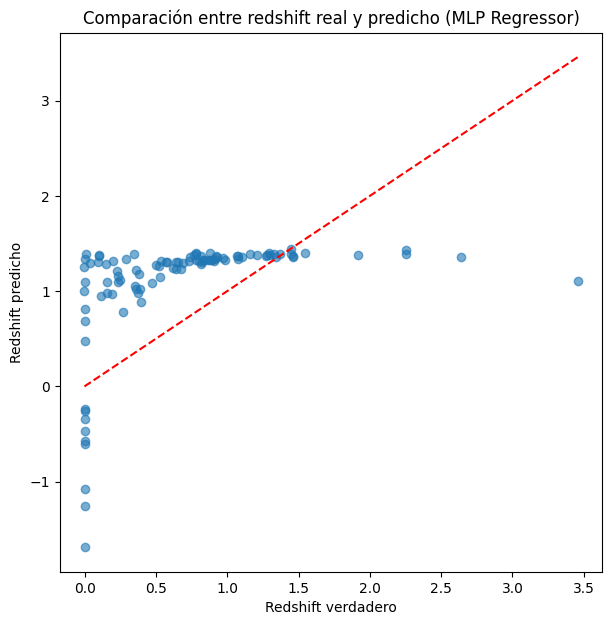

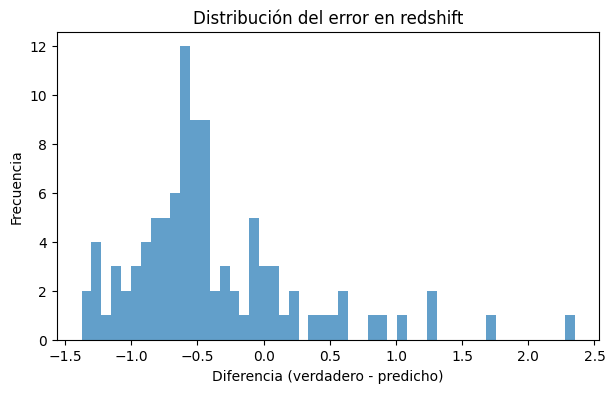

In [5]:
#Usando specttype en las X´s y usando en las Y's la parte de redshifts... Usamos regresion para predecir el redshift de alguna entrada.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Datos
df_spectra = pd.read_csv(r'balanced_spectra_features.csv')
print("Columnas:", df_spectra.columns.tolist())

data = np.load(r'balanced_spectra_flux.npz', allow_pickle=True)
ids = data['targetids']
flujo_ar = data['flux_arrays']

flujo_dict = {tid: flux for tid, flux in zip(ids, flujo_ar)}

X = []
y = []

for tid in ids:
    spectype = df_spectra.loc[df_spectra['targetid'] == tid]
    if not spectype.empty:
        X.append(flujo_dict[tid])
        y.append(spectype['redshift'].values[0])

X = np.array(X)
y = np.array(y)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

print("Entrenando modelo...")
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.6f}")
print(f"R2 Score: {r2:.4f}")

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Redshift verdadero")
plt.ylabel("Redshift predicho")
plt.title("Comparación entre redshift real y predicho (MLP Regressor)")
plt.show()

# Diferencias
diff = y_test - y_pred
plt.figure(figsize=(7,4))
plt.hist(diff, bins=50, alpha=0.7)
plt.xlabel("Diferencia (verdadero - predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución del error en redshift")
plt.show()